#3.1 텐서와 Autograd

##3.1.1 텐서의 차원 자유자재로 다루기

In [1]:
import torch

In [2]:
#rank 2 텐서

x = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [3]:
#모양확인..
print("Size :", x.size())
print("Shape : ", x.shape)
print("Rank(dimension) :", x.ndimension())

Size : torch.Size([3, 3])
Shape :  torch.Size([3, 3])
Rank(dimension) : 2


In [4]:
x = torch.unsqueeze(x,0) #rank 늘리기
print(x)
print("Size :", x.size())
print("Shape : ", x.shape)
print("Rank(dimension) :", x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size : torch.Size([1, 3, 3])
Shape :  torch.Size([1, 3, 3])
Rank(dimension) : 3


In [5]:
x = torch.squeeze(x)    #rank 줄이기
print(x)
print("Size :", x.size())
print("Shape : ", x.shape)
print("Rank(dimension) :", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size : torch.Size([3, 3])
Shape :  torch.Size([3, 3])
Rank(dimension) : 2


In [6]:
#shape 바꾸기..

x = x.view(9)
print(x)
print("Size :", x.size())
print("Shape : ", x.shape)
print("Rank(dimension) :", x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size : torch.Size([9])
Shape :  torch.Size([9])
Rank(dimension) : 1


위의 과정 모두 텐서의 원소 수는 바꾸지 않는다..

- shape가 딱딱 맞아 떨어져야한다!

In [7]:
#원소 수가 9인데 [2,4]로 바꾸려고 하면 에러..
try:
    x = x.view(2,4)
except Exception as e:
    print(e)        #에러 출력

shape '[2, 4]' is invalid for input of size 9


##3.1.2 텐서를 이용한 연산과 행렬곱

행렬곱은 꼭 알자..

In [8]:
import torch

w = torch.randn(5,3, dtype=torch.float)        #랜덤 행렬
x = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])      #직접 생성..
print("w Size :", w.size())
print("x Size :", x.size())
print("w:", w)
print("x:", x)

w Size : torch.Size([5, 3])
x Size : torch.Size([3, 2])
w: tensor([[ 0.9387,  0.0436, -0.6911],
        [ 0.5375,  0.4013, -0.2866],
        [-0.2050,  0.2317, -0.5631],
        [ 1.6298,  0.2968,  0.8781],
        [-0.1933,  1.2216,  0.3228]])
x: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [9]:
b = torch.randn(5,2, dtype=torch.float)     #또다른 랜덤 텐서
print("b size :", b.size())
print("b :", b)

b size : torch.Size([5, 2])
b : tensor([[ 0.0147,  0.4587],
        [ 0.8174, -1.9353],
        [-1.5519,  0.0251],
        [ 0.9205,  1.4428],
        [ 0.4002, -3.2711]])


**torch.mm(a,b)**

- a * b의 행렬곱을 수행..

In [10]:
wx = torch.mm(w, x)
print("wx size :", wx.size())
print("wx :", wx)

wx size : torch.Size([5, 2])
wx : tensor([[-2.3862, -2.0950],
        [ 0.3086,  0.9609],
        [-2.3253, -2.8617],
        [ 6.9106,  9.7152],
        [ 5.0855,  6.4366]])


In [11]:
result = wx + b
print("result size :", result.size())
print("result :", result)

result size : torch.Size([5, 2])
result : tensor([[-2.3715, -1.6363],
        [ 1.1260, -0.9744],
        [-3.8772, -2.8366],
        [ 7.8311, 11.1580],
        [ 5.4857,  3.1655]])


##3.1.3 Autograd

경사하강법 쓸 때 좋다..

텐서 생성시 requires_grad = True로 지정하면 미분값이 .grad에 저장됨

In [12]:
w = torch.tensor(1.0, requires_grad=True)

In [13]:
a = w*3

In [14]:
l = a**2

$l = a^2 = (3w)^2 = 9w^2$

- $l$을 $w$로 미분하려면 $a$를 거쳐서 연쇄법칙을 이용해야함..
- 차례대로 미분해주는 backward() 함수..

In [15]:
#연쇄적으로 미분해줌..
l.backward()
print("l을 w로 미분한 값은 {}".format(w.grad))  #미분해서 w에 1을 대입까지 함

l을 w로 미분한 값은 18.0


#3.2 경사하강법으로 이미지 복원하기

##3.2.1 오염된 이미지 문제

##3.2.2 오염된 이미지를 복원하는 방법

- 오염시키는 코드를 알고있다..
- 오염된 결과를 알고있다..
- 아무 랜덤 이미지를 오염시키는 코드에 넣어서 주어진 결과와 비슷해지면 랜덤 이미지가 정답이라고 할 수 있다..

##3.2.3 문제 해결과 코드 구현

In [16]:
import torch
import pickle
import matplotlib.pyplot as plt

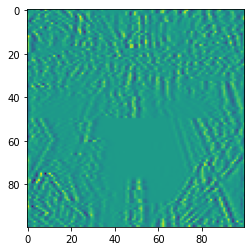

In [17]:
broken_image = torch.FloatTensor(
    pickle.load(open('/content/drive/MyDrive/Colab Notebooks/3분_파이토치/CH03/broken_image_t.p' ,'rb'), encoding='latin1')
    )

plt.imshow(broken_image.view(100,100))

In [18]:
#오염 시키는 코드..
def weird_function(x, n_iter=5):
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat((zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0)
        h = filt[0]*h + filt[2]*h_l + filt[1]*h_r
        if i % 2 == 0:
            h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
        return h

In [19]:
#오차를 구하는 함수..
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

In [20]:
#무작위 텐서 생성..
random_tensor = torch.randn(10000, dtype=torch.float)

In [21]:
#학습률..
lr = 0.8

In [22]:
#경사하강법
for i in range(0, 50000):
    random_tensor.requires_grad_(True)  #경사 계산을 위한 활성화
    hypothesis = weird_function(random_tensor, )    #오염시키고
    loss = distance_loss(hypothesis, broken_image)  #정답과의 차이를 확인..
    loss.backward()     #미분계수를 확인.. loss는 random_tensor에 대한 식.. -> 연쇄법칙으로 계산

    #자동계산이 안되도록 no_grad()모드로 전환..
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 10000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 57.42522430419922
Loss at 10000 = 0.14718642830848694
Loss at 20000 = 0.14702291786670685
Loss at 30000 = 0.1469571739435196
Loss at 40000 = 0.14678634703159332


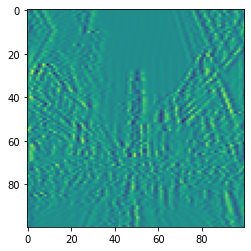

In [23]:
#이상하긴 한데..
plt.imshow(random_tensor.view(100,100).data)

#3.3 신경망 모델 구현하기

##3.3.1 인공 신경망(ANN)

- 입력층, 은닉층, 출력층
- 입력의 가중치 합을 활성화 함수에 통과시켜 결괏값을 산출
- 결과를 정답과 비교해서 오차 계산
- 오차를 기반으로 신경망 전체를 학습.. by 경사하강법 -> **역전파** 알고리즘
- [Sung Kim lec9-2](https://youtu.be/573EZkzfnZ0)

##3.3.2 간단한 분류 모델 구현하기

In [24]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [25]:
n_dim = 2
#2차원의 샘플 데이터 생성.. 4개의 클러스터를 중심으로 하는 데이터..
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim,
                              centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                              shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim,
                            centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                            shuffle=True, cluster_std=0.3)

In [26]:
#레이블을 0과 1로 한정..
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0,1], 0)
y_train = label_map(y_train, [2,3], 1)
y_test = label_map(y_test, [0,1], 0)
y_test = label_map(y_test, [2,3], 1)

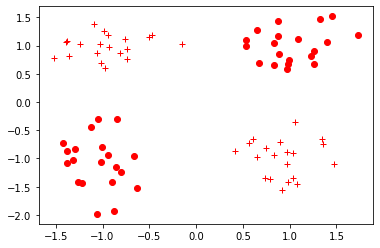

In [27]:
#시각화 한번..
def vis_data(x,y=None, c='r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',
                     markerfacecolor='none', markeredgecolor=c)
        else:
            #0 클러스터이면 o, 1 클러스터이면 +로 표시..
            plt.plot(x_[0], x_[1],
                     c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [28]:
#넘파이 벡터를 파이토치 텐서로 바꿈..
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

본격적인 신경망 모델 구현

In [29]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):        #입력층 크기, 은닉층 크기 매개변수로 받음..
        super(NeuralNet, self).__init__()
        #각각 저장
        self.input_size = input_size
        self.hidden_size = hidden_size

        #수행할 연산들..
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)  #가중치합 계산 (입력에 대한..)
        self.relu = torch.nn.ReLU()     #렐루 함수 통과..
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)    #가중치합 계산 (은닉층에 대한..)
        self.sigmoid = torch.nn.Sigmoid()   #시그모이드 함수 통과..

    #순전파.. (결과 계산..)
    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

In [30]:
model = NeuralNet(2,5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()

In [31]:
epochs = 2000

In [32]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [33]:
model.eval()
#squeeze()로 크기 맞춰줌..
test_loss_before = criterion(model(x_test).squeeze(), y_test)
#item() : 텐서속의 숫자를 스칼라로 반환..
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.6696684956550598


신경망 학습..

In [34]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)

    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))

    #오차함수를 가중치로 미분한다..
    train_loss.backward()
    #그 반대 방향으로 모델을 학습률 만큼 이동시킨다..
    optimizer.step()

Train loss at 0 is 0.6676934957504272
Train loss at 100 is 0.5644249320030212
Train loss at 200 is 0.4653097987174988
Train loss at 300 is 0.3688212037086487
Train loss at 400 is 0.2922808527946472
Train loss at 500 is 0.2364058494567871
Train loss at 600 is 0.19621704518795013
Train loss at 700 is 0.16637636721134186
Train loss at 800 is 0.14385166764259338
Train loss at 900 is 0.126219242811203
Train loss at 1000 is 0.11196042597293854
Train loss at 1100 is 0.10021550953388214
Train loss at 1200 is 0.09041041135787964
Train loss at 1300 is 0.08213405311107635
Train loss at 1400 is 0.07507763803005219
Train loss at 1500 is 0.06900326907634735
Train loss at 1600 is 0.06373211741447449
Train loss at 1700 is 0.05912483483552933
Train loss at 1800 is 0.055071234703063965
Train loss at 1900 is 0.051508765667676926


성능 평가..

In [35]:
model.eval()
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.06516601145267487


모델 저장..

In [36]:
torch.save(model.state_dict(),
           "/content/drive/MyDrive/Colab Notebooks/3분_파이토치/CH03/model.pt")

언제든지 불러올 수 있다..

In [37]:
new_model = NeuralNet(2,5)
#아까 저장한 가중치를 가짐..
new_model.load_state_dict(
    torch.load("/content/drive/MyDrive/Colab Notebooks/3분_파이토치/CH03/model.pt"))

<All keys matched successfully>

In [38]:
new_model.eval()

NeuralNet(
  (linear_1): Linear(in_features=2, out_features=5, bias=True)
  (relu): ReLU()
  (linear_2): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [39]:
#벡터 [-1,1]이 레이블 1을 가질 확률..
#아까 클러스터였으므로 높은 확률이 맞는거다..

new_model(torch.FloatTensor([-1,1])).item()

0.9933871626853943